In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


#Cleaning_Movies_df


In [22]:
movies_df = pd.read_csv("movies_sample.csv")
movies_df.head()

,movieId,title,genres
0,173479,The Boss's Daughter (2016),Comedy|Drama|Romance
1,199508,Kizi mizi (2007),Animation|Romance
2,155176,Erika - The Performer (1971),Drama
3,33051,Skin Game (1971),Comedy|Romance|Western
4,124939,The Perfect Furlough (1958),Comedy


In [23]:
movies_df.describe()

,movieId
count,5000.000000
mean,120807.817000
std,64195.105594
min,11.000000
25%,80263.000000
50%,136836.000000
75%,172968.000000
max,209155.000000


<Axes: >

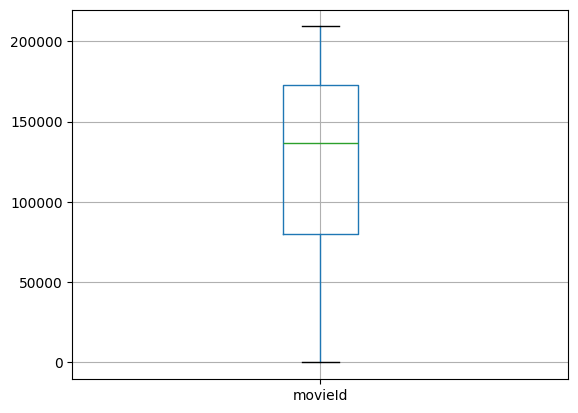

In [24]:
movies_df.boxplot()

#IMDB data cleaning 

In [55]:
imdb_df = pd.read_csv("imdb_data_sample.csv")
imdb_df.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,2111,NaN,NaN,NaN,NaN,NaN
1,125646,NaN,NaN,NaN,NaN,NaN
2,4221,Scott Bakula|Hector Elizondo|Robert Loggia|Har...,Rick Natkin,108.0,"$13,500,000",locker room|men's locker room|farm|bar
3,76714,NaN,NaN,NaN,NaN,NaN
4,88744,Andy Serkis|Karin Konoval|Terry Notary|Richard...,Rick Jaffa,105.0,"$93,000,000",ape|chimpanzee|alzheimer's disease|when animal...


In [56]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        5000 non-null   int64  
 1   title_cast     3144 non-null   object 
 2   director       3176 non-null   object 
 3   runtime        2768 non-null   float64
 4   budget         1489 non-null   object 
 5   plot_keywords  2970 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 234.5+ KB


In [57]:
imdb_df.isnull().sum()

movieId             0
title_cast       1856
director         1824
runtime          2232
budget           3511
plot_keywords    2030
dtype: int64

In [58]:
imdb_df.set_index("movieId",inplace=True)
imdb_df.head()

,title_cast,director,runtime,budget,plot_keywords
movieId,,,,,
2111,NaN,NaN,NaN,NaN,NaN
125646,NaN,NaN,NaN,NaN,NaN
4221,Scott Bakula|Hector Elizondo|Robert Loggia|Har...,Rick Natkin,108.0,"$13,500,000",locker room|men's locker room|farm|bar
76714,NaN,NaN,NaN,NaN,NaN
88744,Andy Serkis|Karin Konoval|Terry Notary|Richard...,Rick Jaffa,105.0,"$93,000,000",ape|chimpanzee|alzheimer's disease|when animal...


In [46]:
# nonzero_index = imdb_df.index[~(imdb_df ==0).all(axis=1)]

In [59]:
imdb_df.fillna(0,inplace=True)
imdb_df.head()

,title_cast,director,runtime,budget,plot_keywords
movieId,,,,,
2111,0,0,0.0,0,0
125646,0,0,0.0,0,0
4221,Scott Bakula|Hector Elizondo|Robert Loggia|Har...,Rick Natkin,108.0,"$13,500,000",locker room|men's locker room|farm|bar
76714,0,0,0.0,0,0
88744,Andy Serkis|Karin Konoval|Terry Notary|Richard...,Rick Jaffa,105.0,"$93,000,000",ape|chimpanzee|alzheimer's disease|when animal...


In [60]:
nonzero_index = imdb_df.index[~(imdb_df==0).all(axis=1)]
nonzero_index

Index([  4221,  88744, 116397,   6949, 130344,  93450,   6321,  45662,  64030,
        82366,
       ...
         5295, 110453,  60930, 107910,    692,  86148, 123735,  90071,  26962,
        89244],
      dtype='int64', name='movieId', length=3185)

In [28]:
# df = pd.DataFrame([[0, 0, 0], [1, 2, 3], [0, 4, 0], [5, 0, 0], [0, 0, 6]])
# non_zero_rows = df.index[~(df == 0).all(axis=1)]
# non_zero_rows 

Index([1, 2, 3, 4], dtype='int64')

In [248]:
imdb_new = imdb_df.loc[nonzero_index]
imdb_new

,title_cast,director,runtime,budget,plot_keywords
movieId,,,,,
4221,Scott Bakula|Hector Elizondo|Robert Loggia|Har...,Rick Natkin,108.0,"$13,500,000",locker room|men's locker room|farm|bar
88744,Andy Serkis|Karin Konoval|Terry Notary|Richard...,Rick Jaffa,105.0,"$93,000,000",ape|chimpanzee|alzheimer's disease|when animal...
116397,Kate Beckinsale|Jim Sturgess|David Thewlis|Bre...,Edgar Allan Poe,112.0,0,madhouse|mental institution|gothic horror|psyc...
6949,Jon Favreau|Joey Lauren Adams|Bud Cort|Jon Gri...,Steve Anderson,0.0,0,cowboy|neighbor|suitcase|fbi agent
130344,0,Lois Patiño,81.0,0,Documentary
...,...,...,...,...,...
86148,Evan Ross|Stephanie Lugo|Maurice Blake|Omar Re...,Buddy Giovinazzo,0.0,"$4,000,000",cleavage|scantily clad female|upskirt|breasts
123735,Phyllis Antonellis|George Bancroft|Richard Bar...,Phyllis Antonellis,93.0,0,gay|1980s|aids|celluloid closet
90071,J.K. Simmons|Cara Seymour|Lou Taylor Pucci|Sco...,Jim Kohlberg,0.0,"$4,000,000",0


In [249]:
imdb_new['budget'] = imdb_new['budget'].str.replace('[^\d.]', '', regex=True).astype(float)
imdb_new.fillna(0,inplace=True)
a

'abebe|kebede|sisay'

In [250]:
x = imdb_new['budget']
imdb_new['budget'] = (x-x.mean())/(max(x) - min(x))
imdb_new['budget']

movieId
4221     -0.000436
88744     0.002214
116397   -0.000886
6949     -0.000886
130344   -0.000886
            ...   
86148    -0.000752
123735   -0.000886
90071    -0.000752
26962    -0.000886
89244    -0.000756
Name: budget, Length: 3185, dtype: float64

In [251]:
# print(imdb_new['budget'].idxmin())
# print(imdb_new['budget'].idxmax())
imdb_new[imdb_new['budget'] == min(imdb_new['budget'])]

,title_cast,director,runtime,budget,plot_keywords
movieId,,,,,
116397,Kate Beckinsale|Jim Sturgess|David Thewlis|Bre...,Edgar Allan Poe,112.0,-0.000886,madhouse|mental institution|gothic horror|psyc...
6949,Jon Favreau|Joey Lauren Adams|Bud Cort|Jon Gri...,Steve Anderson,0.0,-0.000886,cowboy|neighbor|suitcase|fbi agent
130344,0,Lois Patiño,81.0,-0.000886,Documentary
6321,Bette Midler|John Goodman|Trini Alvarado|Steph...,Olive Higgins Prouty,109.0,-0.000886,motherhood|sacrificing for one's child|charact...
104772,Levi Fiehler|Jenna Gallaher|Taylor M. Graham|T...,Domonic Muir,83.0,-0.000886,evil toy|puppet|nazi|saboteur
...,...,...,...,...,...
72637,0,Gitanjali Rao,0.0,-0.000886,0
5295,Mia Kirshner|Meredith Monroe|Dominique Swain|S...,Victoria Strouse,91.0,-0.000886,college|college student|debauchery|cunnilingus
107910,Charlie Adler|Pamela Adlon|Carlos Alazraqui|Ja...,Lawrence Shapiro,90.0,-0.000886,voice acting|voice actor|voice|actor


In [252]:
# a = imdb_new['plot_keywords'].apply(lambda x:x.split('|'))
a = imdb_new['plot_keywords']
a

movieId
4221                 locker room|men's locker room|farm|bar
88744     ape|chimpanzee|alzheimer's disease|when animal...
116397    madhouse|mental institution|gothic horror|psyc...
6949                     cowboy|neighbor|suitcase|fbi agent
130344                                          Documentary
                                ...                        
86148         cleavage|scantily clad female|upskirt|breasts
123735                      gay|1980s|aids|celluloid closet
90071                                                     0
26962     psychiatrist|male full frontal nudity|pubic ha...
89244     artistic creation|louvre|female nudity|male re...
Name: plot_keywords, Length: 3185, dtype: object

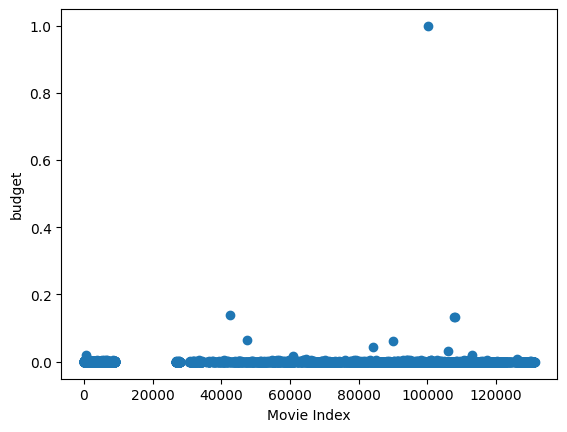

In [109]:
plt.scatter(imdb_new.index, imdb_new['budget'])
plt.xlabel('Movie Index')
plt.ylabel('budget')
plt.show()

In [111]:
imdb_new['plot_keywords']

movieId
4221                 locker room|men's locker room|farm|bar
88744     ape|chimpanzee|alzheimer's disease|when animal...
116397    madhouse|mental institution|gothic horror|psyc...
6949                     cowboy|neighbor|suitcase|fbi agent
130344                                          Documentary
                                ...                        
86148         cleavage|scantily clad female|upskirt|breasts
123735                      gay|1980s|aids|celluloid closet
90071                                                     0
26962     psychiatrist|male full frontal nudity|pubic ha...
89244     artistic creation|louvre|female nudity|male re...
Name: plot_keywords, Length: 3185, dtype: object

In [115]:
a = imdb_new['plot_keywords'].str.split("|")
a

movieId
4221            [locker room, men's locker room, farm, bar]
88744     [ape, chimpanzee, alzheimer's disease, when an...
116397    [madhouse, mental institution, gothic horror, ...
6949                [cowboy, neighbor, suitcase, fbi agent]
130344                                        [Documentary]
                                ...                        
86148     [cleavage, scantily clad female, upskirt, brea...
123735                 [gay, 1980s, aids, celluloid closet]
90071                                                   NaN
26962     [psychiatrist, male full frontal nudity, pubic...
89244     [artistic creation, louvre, female nudity, mal...
Name: plot_keywords, Length: 3185, dtype: object

In [253]:
a = lbl.fit_transform(a)
a

TypeError: 'int' object is not iterable

In [ ]:
b= imdb_new['plot_keywords'].apply(lambda x:x.split('|'))
b

for i in imdb_df['plot_keywords']:
    print(type(i))

In [255]:
nonIndex = imdb_new[(imdb_new['plot_keywords']==0)].index
# nonIndex['plot_keywords']

In [256]:
a = imdb_new.drop(index=nonIndex)
a


,title_cast,director,runtime,budget,plot_keywords
movieId,,,,,
4221,Scott Bakula|Hector Elizondo|Robert Loggia|Har...,Rick Natkin,108.0,-0.000436,locker room|men's locker room|farm|bar
88744,Andy Serkis|Karin Konoval|Terry Notary|Richard...,Rick Jaffa,105.0,0.002214,ape|chimpanzee|alzheimer's disease|when animal...
116397,Kate Beckinsale|Jim Sturgess|David Thewlis|Bre...,Edgar Allan Poe,112.0,-0.000886,madhouse|mental institution|gothic horror|psyc...
6949,Jon Favreau|Joey Lauren Adams|Bud Cort|Jon Gri...,Steve Anderson,0.0,-0.000886,cowboy|neighbor|suitcase|fbi agent
130344,0,Lois Patiño,81.0,-0.000886,Documentary
...,...,...,...,...,...
692,Mario Van Peebles|Barry Corbin|William Sadler|...,Norberto Barba,94.0,-0.000252,military|android|artificial intelligence|super...
86148,Evan Ross|Stephanie Lugo|Maurice Blake|Omar Re...,Buddy Giovinazzo,0.0,-0.000752,cleavage|scantily clad female|upskirt|breasts
123735,Phyllis Antonellis|George Bancroft|Richard Bar...,Phyllis Antonellis,93.0,-0.000886,gay|1980s|aids|celluloid closet


In [257]:
imdb_new =a
imdb_new

,title_cast,director,runtime,budget,plot_keywords
movieId,,,,,
4221,Scott Bakula|Hector Elizondo|Robert Loggia|Har...,Rick Natkin,108.0,-0.000436,locker room|men's locker room|farm|bar
88744,Andy Serkis|Karin Konoval|Terry Notary|Richard...,Rick Jaffa,105.0,0.002214,ape|chimpanzee|alzheimer's disease|when animal...
116397,Kate Beckinsale|Jim Sturgess|David Thewlis|Bre...,Edgar Allan Poe,112.0,-0.000886,madhouse|mental institution|gothic horror|psyc...
6949,Jon Favreau|Joey Lauren Adams|Bud Cort|Jon Gri...,Steve Anderson,0.0,-0.000886,cowboy|neighbor|suitcase|fbi agent
130344,0,Lois Patiño,81.0,-0.000886,Documentary
...,...,...,...,...,...
692,Mario Van Peebles|Barry Corbin|William Sadler|...,Norberto Barba,94.0,-0.000252,military|android|artificial intelligence|super...
86148,Evan Ross|Stephanie Lugo|Maurice Blake|Omar Re...,Buddy Giovinazzo,0.0,-0.000752,cleavage|scantily clad female|upskirt|breasts
123735,Phyllis Antonellis|George Bancroft|Richard Bar...,Phyllis Antonellis,93.0,-0.000886,gay|1980s|aids|celluloid closet


In [258]:
x =imdb_new[imdb_new['title_cast']==0]


In [259]:
nonIndex = x.index
imdb_new = imdb_new.drop(nonIndex)


In [232]:
samples = [['red', 'yellow'], ['red', 'blue'], ['yellow', 'green']]
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
binary_matrix = mlb.fit_transform(samples)
print(binary_matrix)
# Output: [[1 1 0]
#          [1 0 1]
#          [0 1 1]]

print(mlb.classes_)
# Output: ['blue', 'green', 'red', 'yellow']

[[0 0 1 1]
 [1 0 1 0]
 [0 1 0 1]]
['blue' 'green' 'red' 'yellow']


In [261]:
a = imdb_new
a['title_cast'] = lbl.fit_transform(a['title_cast'])
a

,title_cast,director,runtime,budget,plot_keywords
movieId,,,,,
4221,1,Rick Natkin,108.0,-0.000436,locker room|men's locker room|farm|bar
88744,1,Rick Jaffa,105.0,0.002214,ape|chimpanzee|alzheimer's disease|when animal...
116397,1,Edgar Allan Poe,112.0,-0.000886,madhouse|mental institution|gothic horror|psyc...
6949,1,Steve Anderson,0.0,-0.000886,cowboy|neighbor|suitcase|fbi agent
6321,1,Olive Higgins Prouty,109.0,-0.000886,motherhood|sacrificing for one's child|charact...
...,...,...,...,...,...
692,1,Norberto Barba,94.0,-0.000252,military|android|artificial intelligence|super...
86148,1,Buddy Giovinazzo,0.0,-0.000752,cleavage|scantily clad female|upskirt|breasts
123735,1,Phyllis Antonellis,93.0,-0.000886,gay|1980s|aids|celluloid closet


In [216]:
from sklearn.preprocessing import MultiLabelBinarizer
alg  = MultiLabelBinarizer()
title = alg.fit_transform(title)
title

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [230]:
t = (imdb_new['title_cast'][4221]).split('|')
t

['Scott Bakula',
 'Hector Elizondo',
 'Robert Loggia',
 'Harley Jane Kozak',
 'Larry Miller',
 'Sinbad',
 'Fred Thompson',
 'Rob Schneider',
 'Jason Bateman',
 'Andrew Bryniarski',
 'Duane Davis',
 'Michael Dolan',
 'Marcus Giamatti',
 'Kathy Ireland',
 'Andrew Lauer']

In [231]:
t = alg.fit_transform(t)
t

array([[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        1

In [238]:
from sklearn.preprocessing import MultiLabelBinarizer
imdb_new['plot_keywords'] = imdb_new['plot_keywords'].apply(lambda x:x.split('|'))
imdb_new['plot_keywords']

movieId
4221            [locker room, men's locker room, farm, bar]
88744     [ape, chimpanzee, alzheimer's disease, when an...
116397    [madhouse, mental institution, gothic horror, ...
6949                [cowboy, neighbor, suitcase, fbi agent]
6321      [motherhood, sacrificing for one's child, char...
                                ...                        
692       [military, android, artificial intelligence, s...
86148     [cleavage, scantily clad female, upskirt, brea...
123735                 [gay, 1980s, aids, celluloid closet]
26962     [psychiatrist, male full frontal nudity, pubic...
89244     [artistic creation, louvre, female nudity, mal...
Name: plot_keywords, Length: 2942, dtype: object

In [240]:
imdb_new['title_cast'] = imdb_new['title_cast'].apply(lambda x:x.split('|'))
imdb_new['title_cast']

movieId
4221      [Scott Bakula, Hector Elizondo, Robert Loggia,...
88744     [Andy Serkis, Karin Konoval, Terry Notary, Ric...
116397    [Kate Beckinsale, Jim Sturgess, David Thewlis,...
6949      [Jon Favreau, Joey Lauren Adams, Bud Cort, Jon...
6321      [Bette Midler, John Goodman, Trini Alvarado, S...
                                ...                        
692       [Mario Van Peebles, Barry Corbin, William Sadl...
86148     [Evan Ross, Stephanie Lugo, Maurice Blake, Oma...
123735    [Phyllis Antonellis, George Bancroft, Richard ...
26962     [Amanda Plummer, Robert Forster, David Thewlis...
89244     [Kang-sheng Lee, Yi-Ching Lu, Fanny Ardant, Je...
Name: title_cast, Length: 2942, dtype: object

In [241]:
lbl = MultiLabelBinarizer()
imdb_new['plot_keywords'] = lbl.fit_transform(imdb_new['plot_keywords'] )
imdb_new['title_cast'] = lbl.fit_transform(imdb_new['title_cast'])


In [243]:
imdb_new

,title_cast,director,runtime,budget,plot_keywords
movieId,,,,,
4221,0,Rick Natkin,108.0,-0.000436,0
88744,0,Rick Jaffa,105.0,0.002214,0
116397,0,Edgar Allan Poe,112.0,-0.000886,0
6949,0,Steve Anderson,0.0,-0.000886,0
6321,0,Olive Higgins Prouty,109.0,-0.000886,0
...,...,...,...,...,...
692,0,Norberto Barba,94.0,-0.000252,0
86148,0,Buddy Giovinazzo,0.0,-0.000752,0
123735,0,Phyllis Antonellis,93.0,-0.000886,0


In [247]:
min(imdb_new['title_cast'])

0